In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit


In [53]:
data = pd.read_csv('../data/raw/creditcard.csv.zip')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
data.shape

(284807, 31)

In [78]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [71]:
def strat_split(df,target,test_size,seed):
        
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
    for train_index, test_index in split.split(df, df[f"{target}"]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]
        strat_train_set = strat_train_set.reindex(columns=strat_train_set)
        strat_test_set = strat_test_set.reindex(columns=strat_test_set)

    return strat_train_set,strat_test_set

In [72]:
class_vals = data['Class'].value_counts()
print(class_vals)
# ax = sns.barplot(x=cyl_vals.index,y = cyl_vals.values,data=data)
# ax.set(xlabel='count', ylabel='no of cylinders')


0    284315
1       492
Name: Class, dtype: int64


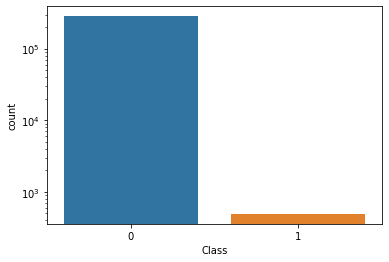

In [73]:
g = sns.countplot(x='Class',data=data)
g.set_yscale("log")
# g.set_ylim(0.05, 1000)

In [74]:
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [79]:
train_data,val_df = strat_split(data,'Class',0.2,42)
print(train_data.shape,val_df.shape)
train_data_class_vals = train_data['Class'].value_counts()
val_class_vals = val_df['Class'].value_counts()
print(train_data_class_vals)
print(val_class_vals)

(227845, 31) (56962, 31)
0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


In [81]:
train_df,test_df = strat_split(train_data,'Class',0.2,42)
print(train_df.shape,test_df.shape)
train_class_vals = train_df['Class'].value_counts()
test_class_vals = test_df['Class'].value_counts()
print(train_class_vals)
print(test_class_vals)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([182045, 133901, 171866,   8356, 124285,\n            ...\n            173017,  84285, 194365, 198535, 195669],\n           dtype='int64', length=36411). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [69]:
print(np.bincount(train_df.Class)[1])
print(np.bincount(test_df.Class)[1])
print(np.bincount(val_df.Class)[1])
print(np.bincount(data.Class)[1])

334
83
98
492


In [70]:
334+98+83

515

In [38]:
def is_balanced_splitting(y):
    counts = np.bincount(y)
    return counts[1] / (sum(counts))

In [39]:
print('Percentage of FRAUD instances in Training Set : {}'.format(is_balanced_splitting(train_df.Class) * 100))
print('Percentage of FRAUD instances in Testing Set : {}'.format(is_balanced_splitting(test_df.Class) * 100))
print('Percentage of FRAUD instances in Validation set : {}'.format(is_balanced_splitting(val_df.Class) * 100))

Percentage of FRAUD instances in Training Set : 0.17292457591783889
Percentage of FRAUD instances in Testing Set : 0.17204452090867595
Percentage of FRAUD instances in Validation set : 0.17204452090867595
